In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/diogo/programs/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
from mpl_toolkits.basemap import Basemap

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [64]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [65]:
z = 0

In [66]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [67]:
a1r = []
a25r = []
for i,j in enumerate(datalistSr):
    if '_1.0' in j:
        a1r.append(j)
    else:
        a25r.append(j)

a1t = []
a25t = []
for i,j in enumerate(datalistSt):
    if '_1.0' in j:
        a1t.append(j)
    else:
        a25t.append(j)

In [68]:
a1r_name = [i.split('/')[9] for i in a1r]
a1t_name = [i.split('/')[9] for i in a1t]
a25r_name = [i.split('/')[9] for i in a25r]
a25t_name = [i.split('/')[9] for i in a25t]

In [69]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)

In [70]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

<h3 align="center">a = 1.0</h3>

In [71]:
RF = []

for i,j in enumerate(RF_list_r[z]):
    RF += op.read(j)

In [72]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [73]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    RF_25 += op.read(j)

In [74]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    TF_25 += op.read(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [75]:
RFgcarc = [i.stats.sac.gcarc for i in RF]
RFevdp = [i.stats.sac.evdp for i in RF]
RFbaz = [i.stats.sac.baz for i in RF]
RFRP = [i.stats.sac.user8 for i in RF]

orglisl = np.argsort(RFRP)

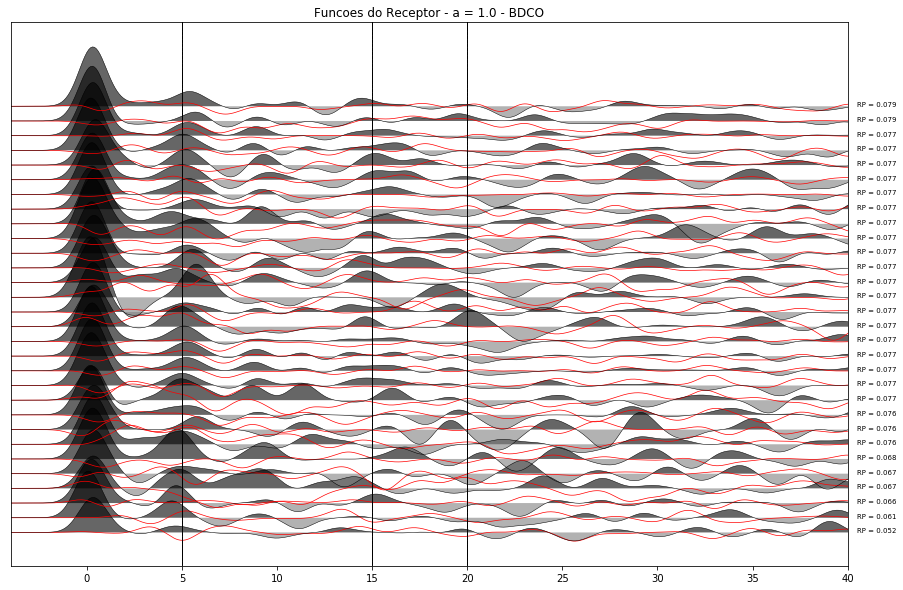

In [76]:
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl): 
    plt.plot(TF[i].times()-10,j/10+TF[i].data,'r',linewidth=0.7)
    plt.plot(RF[i].times()-10,j/10+RF[i].data,'k',linewidth=0.5)
    plt.fill_between(RF[i].times()-10,j/10+RF[i].data,j/10,where=(j/10+RF[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF[i].times()-10,j/10+RF[i].data,j/10,where=(j/10+RF[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/10,'RP = '+"{0:.3f}".format(RFRP[i]),fontsize=7)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)



<h3 align="center">a = 2.5</h3>

In [77]:
RFgcarc_25 = [i.stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i.stats.sac.evdp for i in RF_25]
RFbaz_25 = [i.stats.sac.baz for i in RF_25]
RFRP_25 = [i.stats.sac.user8 for i in RF_25]

#orglisl_25 = np.argsort(RFbaz_25)
orglisl_25 = np.argsort(RFRP_25)

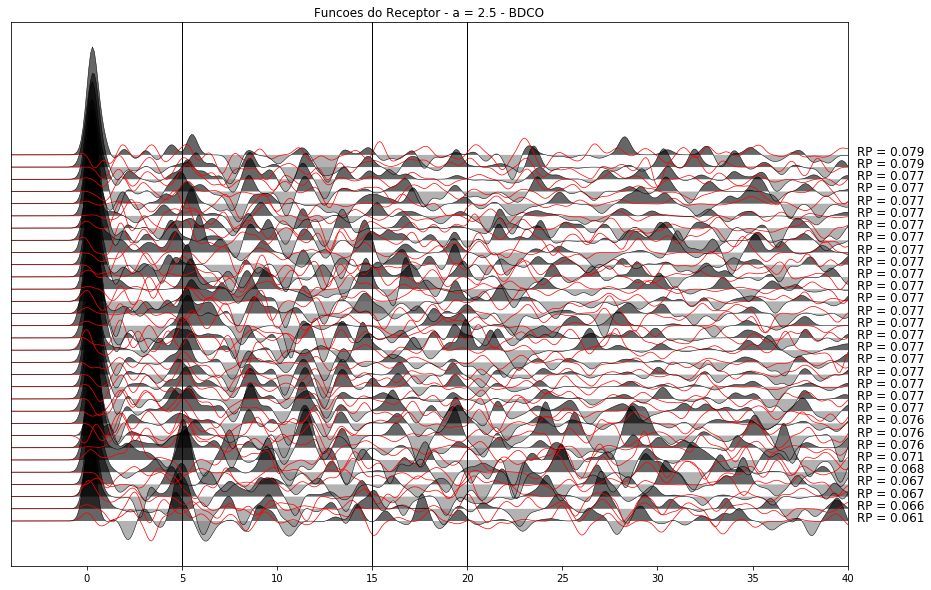

In [78]:
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_25): 
    plt.plot(TF_25[i].times()-10,j/10+TF_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_25[i].times()-10,j/10+RF_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)>=j/10, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/10+RF_25[i].data,j/10,where=(j/10+RF_25[i].data)<=j/10, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/10,'RP = '+"{0:.3f}".format(RFRP_25[i]),fontsize=12)
    #plt.text(40.5,j/10,'BAZ = %s' % (RFbaz_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">Empilhando as Funções do Receptor após a filtragem</h3>

<h3 align="center">a = 1.0 </h3>

In [79]:
RF_stack = np.array(RF).sum(axis=0)/len(RF)

In [80]:
y = []
for i,j in enumerate(RF): 
    y.append(j.data)

In [81]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

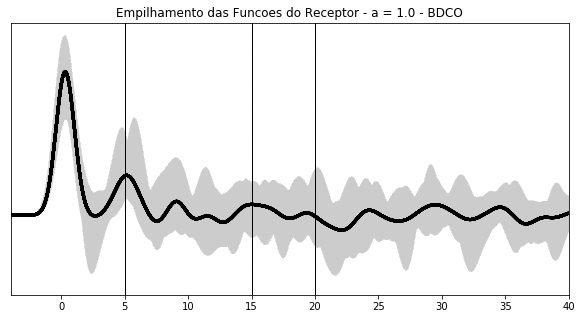

In [82]:
plt.figure(figsize = (10,5))
for j, i in enumerate(RF): 
    plt.plot(RF[1].times()-10,RF_stack,'k',linewidth=3)
    plt.fill_between(RF[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">a = 2.5 </h3>

In [83]:
RF_stack_25 = np.array(RF_25).sum(axis=0)/len(RF_25)

In [84]:
y_25 = []
for i,j in enumerate(RF_25): 
    y_25.append(j.data)

In [85]:
min_y_25 = [min(a) for a in zip(*y_25)]
max_y_25 = [max(a) for a in zip(*y_25)]

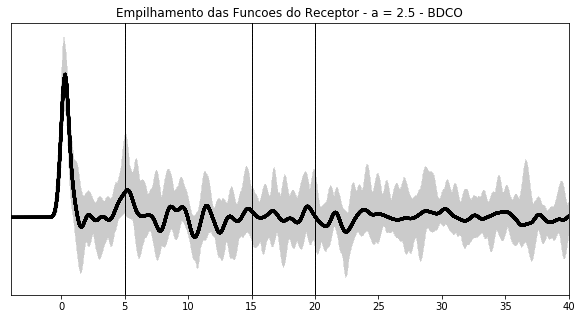

In [86]:
plt.figure(figsize = (10,5))
for j, i in enumerate(RF_25): 
    plt.plot(RF_25[1].times()-10,RF_stack_25,'k',linewidth=3)
    plt.fill_between(RF_25[0].times()-10,min_y_25,max_y_25,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

# Figura Artigo

# 1.0

In [87]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
    
# Collect time of used data

tPs_30 = []
tPpPs_30 = [] 
tPsPs_tPpSs_30 = []
tPs_tPpPs_tPsPs_tPpSs_30 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30):
    tPs_30.append(j[1])
    tPpPs_30.append(j[2]) 
    tPsPs_tPpSs_30.append(j[3])   
tPs_30_stack = sum(tPs_30)/len(tPs_30)
tPpPs_30_stack = sum(tPpPs_30)/len(tPpPs_30)
tPsPs_tPpSs_30_stack = sum(tPsPs_tPpSs_30)/len(tPsPs_tPpSs_30)

RFRbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqr')
RFTbom_30_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/*.eqt')
RF_bom_baz_30_plot = [i.stats.sac.baz for i in RFRbom_30_plot]
orglisl_bom_30_plot = np.argsort(RF_bom_baz_30_plot)

RFR_stack_30_final_plot = op.read('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/*.eqr')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


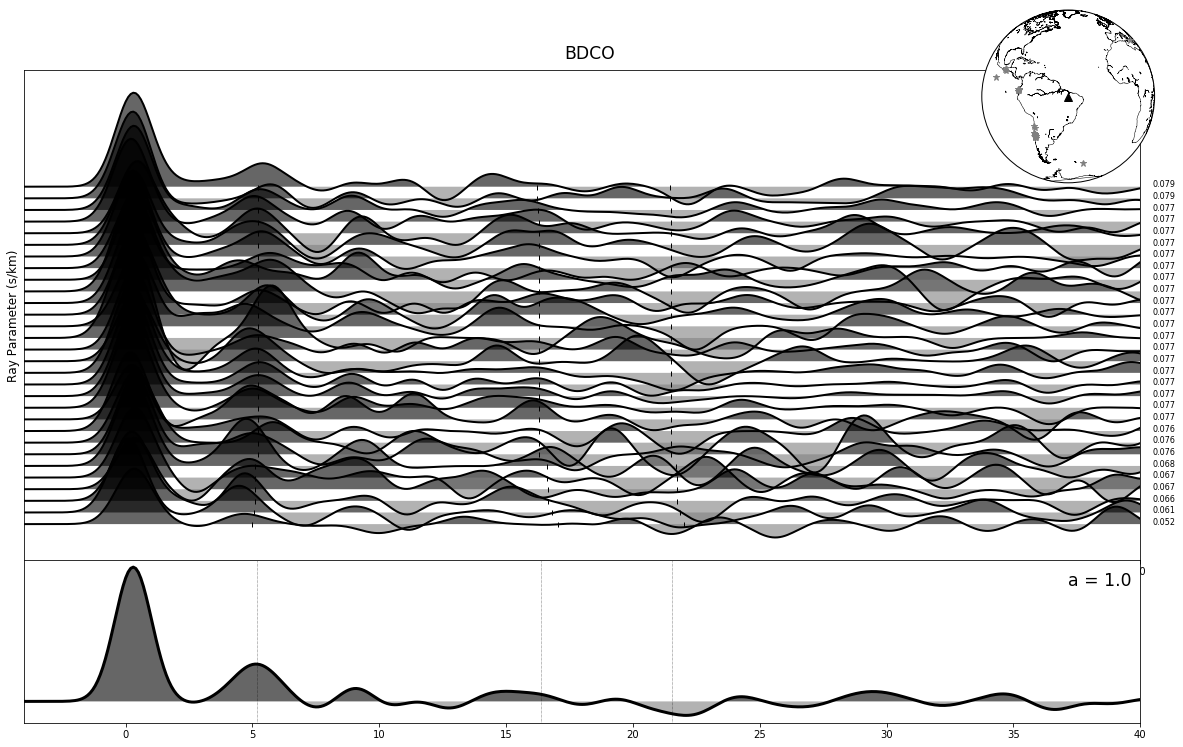

In [88]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    #ax1.plot(TF[i].times()-10,j/factor+TF[i].data,'grey',linewidth=1.5)
    ax1.plot(RF[i].times()-10,j/factor+RF[i].data,'k',linewidth=2)
    plt.fill_between(RF[i].times()-10,j/factor+RF[i].data,j/factor,where=(j/factor+RF[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF[i].times()-10,j/factor+RF[i].data,j/factor,where=(j/factor+RF[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    plt.plot(tPs_30[i],j/factor,"|k",markersize=5)
    plt.plot(tPpPs_30[i],j/factor,"|k",markersize=5)
    plt.plot(tPsPs_tPpSs_30[i],j/factor,"|k",markersize=5)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')
    
# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF[0].times()-10,RF_stack,'k',linewidth=3)
plt.fill_between(RF[0].times()-10,0,RF_stack,where=(RF_stack)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF[0].times()-10,0,RF_stack,where=(RF_stack)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
plt.axvline(x=tPs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
plt.axvline(x=tPpPs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
plt.axvline(x=tPsPs_tPpSs_30_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
ax2.set_yticks([])
ax2.set_xlim(-4,40)

    
# small subplot 3
#plt.subplot2grid((2,2), (1,1))
#im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/pgplot.png'))
#plt.axis("off")
#plt.imshow(im)


#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.85, 0.29, 'a = 1.0', va='center', fontsize='xx-large')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


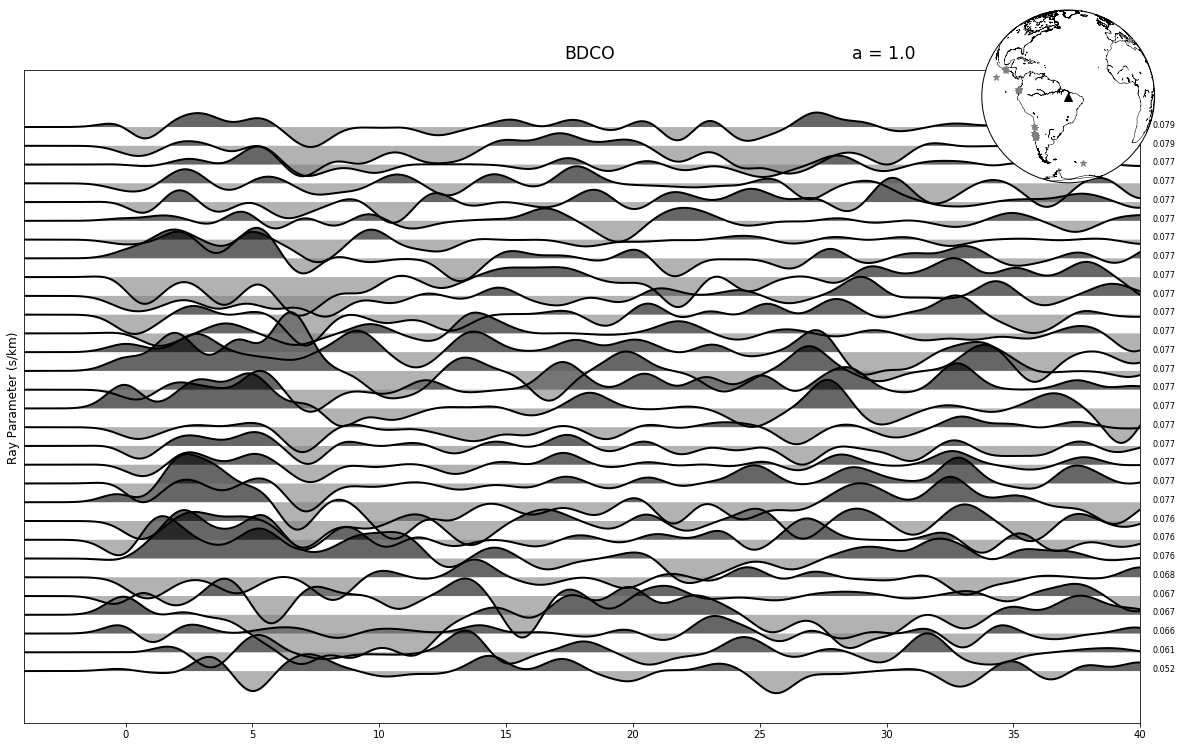

In [89]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(1,1,wspace=1,hspace=0)

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    ax1.plot(TF[i].times()-10,j/factor+TF[i].data,'k',linewidth=2)
    plt.fill_between(TF[i].times()-10,j/factor+TF[i].data,j/factor,where=(j/factor+TF[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(TF[i].times()-10,j/factor+TF[i].data,j/factor,where=(j/factor+TF[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.7, 0.9, 'a = 1.0', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

# 2.5

In [90]:
# Collect all data
evlo_data = []
evla_data = []
magnitudes = [] 
for i, j in enumerate(RF_25):
    stlo_data = j.stats.sac.stlo
    stla_data = j.stats.sac.stla
    evlo_data.append(j.stats.sac.evlo)
    evla_data.append(j.stats.sac.evla)
    magnitudes.append(j.stats.sac.mag)
# Collect time of used data
tPs_30_25 = []
tPpPs_30_25 = [] 
tPsPs_tPpSs_30_25 = []
tPs_tPpPs_tPsPs_tPpSs_30_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/vp_65_tPs_tPpPs_tPsPs_tPpSs_out.txt')
for i,j in enumerate(tPs_tPpPs_tPsPs_tPpSs_30_25):
    tPs_30_25.append(j[1])
    tPpPs_30_25.append(j[2]) 
    tPsPs_tPpSs_30_25.append(j[3]) 
    
tPs_30_25_stack = sum(tPs_30_25)/len(tPs_30_25)
tPpPs_30_25_stack = sum(tPpPs_30_25)/len(tPpPs_30_25)
tPsPs_tPpSs_30_25_stack = sum(tPsPs_tPpSs_30_25)/len(tPsPs_tPpSs_30_25)

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


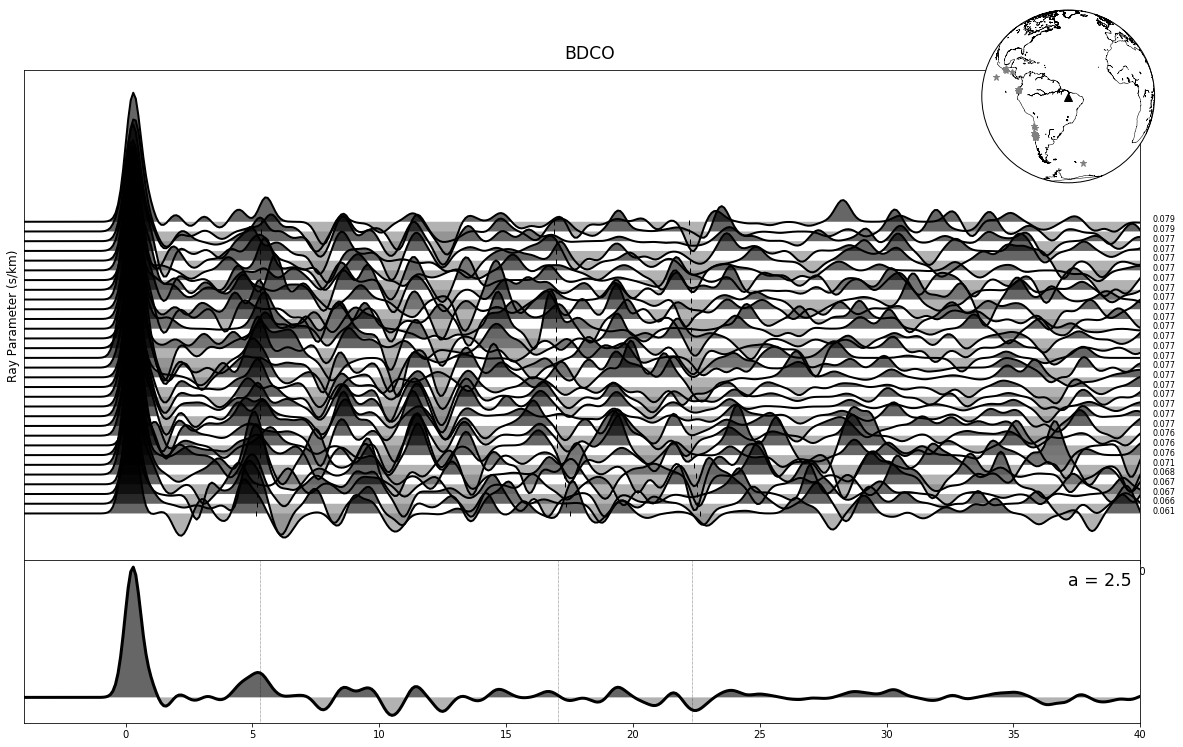

In [91]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])

factor_25 = 15
ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl_25): 
    #ax1.plot(TF_25[i].times()-10,j/factor_25+TF_25[i].data,'gray',linewidth=1.5)
    ax1.plot(RF_25[i].times()-10,j/factor_25+RF_25[i].data,'k',linewidth=2)
    plt.fill_between(RF_25[i].times()-10,j/factor_25+RF_25[i].data,j/factor_25,where=(j/factor_25+RF_25[i].data)>=j/factor_25, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i].times()-10,j/factor_25+RF_25[i].data,j/factor_25,where=(j/factor_25+RF_25[i].data)<=j/factor_25, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor_25,"{0:.3f}".format(RFRP_25[i]),fontsize=8)
    plt.plot(tPs_30_25[i],j/factor_25,"|k",markersize=5)
    plt.plot(tPpPs_30_25[i],j/factor_25,"|k",markersize=5)
    plt.plot(tPsPs_tPpSs_30_25[i],j/factor_25,"|k",markersize=5)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')
    
# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF_25[0].times()-10,RF_stack_25,'k',linewidth=3)
plt.fill_between(RF_25[0].times()-10,0,RF_stack_25,where=(RF_stack_25)>=0, facecolor='black',alpha=0.6, interpolate=True)
plt.fill_between(RF_25[0].times()-10,0,RF_stack_25,where=(RF_stack_25)<=0, facecolor='gray',alpha=0.6, interpolate=True)    
plt.axvline(x=tPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
plt.axvline(x=tPpPs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
plt.axvline(x=tPsPs_tPpSs_30_25_stack, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
ax2.set_yticks([])
ax2.set_xlim(-4,40)
    
# small subplot 3
#plt.subplot2grid((2,2), (1,1))
#im = plt.imread(get_sample_data('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/pgplot.png'))
#plt.axis("off")
#plt.imshow(im)


#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.85, 0.29, 'a = 2.5', va='center', fontsize='xx-large')
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


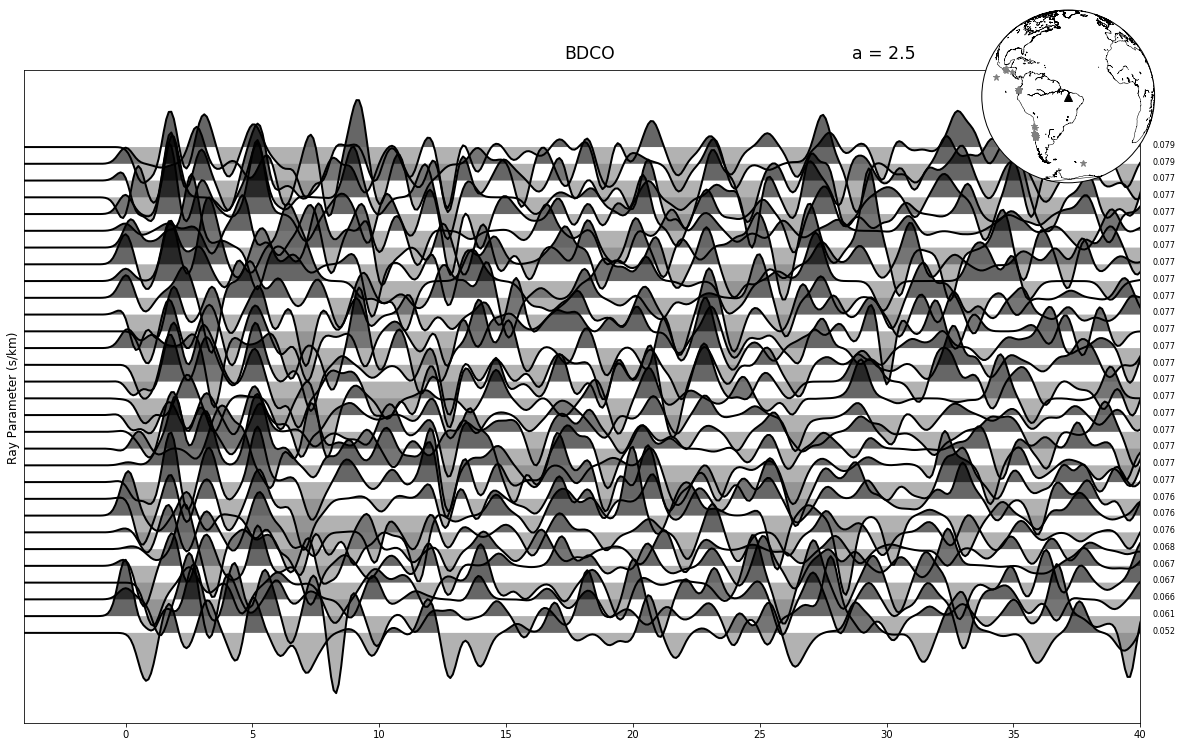

In [92]:
fig = plt.figure(figsize=(20,12),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(1,1,wspace=1,hspace=0)

factor = 20

ax1 = fig.add_subplot(gs[0])
for j, i in enumerate(orglisl): 
    ax1.plot(TF_25[i].times()-10,j/factor+TF_25[i].data,'k',linewidth=2)
    plt.fill_between(TF_25[i].times()-10,j/factor+TF_25[i].data,j/factor,where=(j/factor+TF_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(TF_25[i].times()-10,j/factor+TF_25[i].data,j/factor,where=(j/factor+TF_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(40.5,j/factor,"{0:.3f}".format(RFRP[i]),fontsize=8)
    ax1.set_yticks([])
    ax1.set_ylabel('Ray Parameter (s/km)',fontsize=12)
    ax1.set_xlim(-4,40)

# small subplot 1
a = plt.axes([0.75, 0.75, .2, .2])
m = Basemap(resolution='l',projection='ortho',lat_0=-5.,lon_0=-45.)
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

stx,sty = m(stlo_data, stla_data)
m.plot(stx,sty , '^k', markersize=8)
#plt.text(stx-250000,sty+200000,STA[z],color='w')

m.tissot(stlo_data,stla_data,30,50,edgecolor='w',ls='dashed',linewidth=2,facecolor='none')
#m.tissot(stlo,stla,90,50,zorder=10,edgecolor='w',linewidth=2,facecolor='none')

for lon, lat, mag in zip(evlo_data, evla_data, magnitudes):
    x,y = m(lon, lat)
    msize = mag*1
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='grey')

#plt.tight_layout()
fig.text(0.5, 0.9, STA[z], va='center', fontsize='xx-large')
fig.text(0.7, 0.9, 'a = 2.5', va='center', fontsize='xx-large')
#plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+STA[z]+'_mosaico.pdf')